In [12]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np 

In [151]:
file = pd.ExcelFile('task.xlsx')
names = file.sheet_names

In [2]:
df1 = pd.read_excel(file, names[0])
df2 = pd.read_excel(file, names[1])
df3 = pd.read_excel(file, names[2])
df2

,Order ID,Дата создания,User ID,ID продукта,Оплачен,Дата платежа,Сумма платежа,Сумма заказа,Сумма скидки
0,order1,2019-01-01 05:19:00,id13276,product2,да,2019-01-01 05:22:00,4050.0,4050,0.0
1,order3,2019-01-01 16:07:00,id10315,product1,да,2019-01-01 16:13:00,4300.0,4300,0.0
2,order4,2019-01-01 18:58:00,id10036,product4,да,2019-01-01 19:02:00,4300.0,4300,0.0
3,order6,2019-01-01 19:56:00,id12315,product3,да,2019-01-01 19:58:00,4200.0,4200,0.0
4,order7,2019-01-01 21:24:00,id7700,product2,да,2019-01-01 21:25:00,4050.0,4050,0.0
...,...,...,...,...,...,...,...,...,...
21280,order21938,2019-12-29 21:28:00,id14621,product9,нет,неоплачен,3220.0,4600,1380.0
21281,order21939,2019-12-29 22:08:00,id3056,product9,нет,неоплачен,3220.0,4600,1380.0
21282,order21941,2019-12-29 22:12:00,id3056,product7,нет,неоплачен,2765.0,3950,1185.0
21283,order21946,2019-12-29 23:53:00,id14618,product7,нет,неоплачен,3950.0,3950,0.0


# Задание 1  
## i)

In [3]:
df2.sort_values(by=['User ID', 'ID продукта'])

,Order ID,Дата создания,User ID,ID продукта,Оплачен,Дата платежа,Сумма платежа,Сумма заказа,Сумма скидки
682,order1040,2019-01-31 21:10:00,id1,product1,да,2019-01-31 21:11:00,2580.000000,4300,1720.000000
681,order1039,2019-01-31 21:10:00,id1,product4,да,2019-01-31 21:11:00,2580.000000,4300,1720.000000
5840,order9235,2019-07-15 11:32:00,id10,product10,да,2019-07-15 11:36:00,2520.000000,4200,1680.000000
6683,order10565,2019-07-25 20:29:00,id10,product7,да,2019-07-25 20:30:00,2370.000000,3950,1580.000000
9014,order14304,2019-10-04 18:22:00,id100,product11,да,2019-10-04 18:23:00,4000.000000,4000,0.000000
...,...,...,...,...,...,...,...,...,...
1215,order1865,2019-02-24 07:20:00,id9997,product1,да,2019-02-24 07:20:00,3417.948718,4300,882.051282
14962,order3413,2019-04-09 00:20:00,id9998,product7,нет,неоплачен,3640.196078,3950,309.803922
14963,order3414,2019-04-09 00:20:00,id9998,product7,нет,неоплачен,3640.196078,3950,309.803922
2491,order3811,2019-04-18 10:06:00,id9998,product8,да,2019-04-18 10:07:00,2797.058824,4500,1702.941176


In [4]:
count_paid = 0
count_unpaid = 0
for name, group in df2.groupby(['User ID', 'ID продукта']):
    if (any(group['Оплачен'] == 'да')):
        count_paid += 1
    if all(group['Оплачен'] == 'нет'):
        count_unpaid += 1
    

In [5]:
print('Доля незавершенных заказов = ', round(count_unpaid/(count_paid + count_unpaid) * 100,1), '%')

Доля незавершенных заказов =  29.0 %


###  Доля незвершенных заказов сотавляет 29%

# Задание 2
### a) 
###  i) Посчитать выручку и средние чеки (выручка / кол-во клиентов) юнитов A или B за год. Какой отдел приносит больше выручки компании?

In [6]:
# рассматриваем только оплаченные заказы
df2_paid = df2[df2['Оплачен'] == 'да' ]

In [7]:
df2_paid

,Order ID,Дата создания,User ID,ID продукта,Оплачен,Дата платежа,Сумма платежа,Сумма заказа,Сумма скидки
0,order1,2019-01-01 05:19:00,id13276,product2,да,2019-01-01 05:22:00,4050.0,4050,0.0
1,order3,2019-01-01 16:07:00,id10315,product1,да,2019-01-01 16:13:00,4300.0,4300,0.0
2,order4,2019-01-01 18:58:00,id10036,product4,да,2019-01-01 19:02:00,4300.0,4300,0.0
3,order6,2019-01-01 19:56:00,id12315,product3,да,2019-01-01 19:58:00,4200.0,4200,0.0
4,order7,2019-01-01 21:24:00,id7700,product2,да,2019-01-01 21:25:00,4050.0,4050,0.0
...,...,...,...,...,...,...,...,...,...
13858,order21943,2019-12-29 23:10:00,id5486,product3,да,2019-12-29 23:11:00,2940.0,4200,1260.0
13859,order21944,2019-12-29 23:34:00,id5527,product9,да,2019-12-29 23:35:00,1840.0,4600,2760.0
13860,order21945,2019-12-29 23:50:00,id5315,product7,да,2019-12-29 23:51:00,3950.0,3950,0.0
13861,order21949,2019-12-30 08:59:00,id9255,product4,да,2019-12-30 09:01:00,4300.0,4300,0.0


In [13]:
df2_paid['Юнит'] = np.where(df2_paid['ID продукта'].isin(df1.loc[df1['Юнит'] == 'A', 'ID продукта'].values), 'A', 'B')

In [14]:
df2_paid

,Order ID,Дата создания,User ID,ID продукта,Оплачен,Дата платежа,Сумма платежа,Сумма заказа,Сумма скидки,Юнит
0,order1,2019-01-01 05:19:00,id13276,product2,да,2019-01-01 05:22:00,4050.0,4050,0.0,A
1,order3,2019-01-01 16:07:00,id10315,product1,да,2019-01-01 16:13:00,4300.0,4300,0.0,A
2,order4,2019-01-01 18:58:00,id10036,product4,да,2019-01-01 19:02:00,4300.0,4300,0.0,B
3,order6,2019-01-01 19:56:00,id12315,product3,да,2019-01-01 19:58:00,4200.0,4200,0.0,B
4,order7,2019-01-01 21:24:00,id7700,product2,да,2019-01-01 21:25:00,4050.0,4050,0.0,A
...,...,...,...,...,...,...,...,...,...,...
13858,order21943,2019-12-29 23:10:00,id5486,product3,да,2019-12-29 23:11:00,2940.0,4200,1260.0,B
13859,order21944,2019-12-29 23:34:00,id5527,product9,да,2019-12-29 23:35:00,1840.0,4600,2760.0,B
13860,order21945,2019-12-29 23:50:00,id5315,product7,да,2019-12-29 23:51:00,3950.0,3950,0.0,A
13861,order21949,2019-12-30 08:59:00,id9255,product4,да,2019-12-30 09:01:00,4300.0,4300,0.0,B


In [15]:
revenue = df2_paid.groupby('Юнит').sum()['Сумма платежа']

In [17]:
size = df2_paid.groupby('Юнит').size()
size

Юнит
A    8201
B    5662
dtype: int64

In [24]:
revenue

Юнит
A    2.810115e+07
B    1.981921e+07
Name: Сумма платежа, dtype: float64

**Сумма платежей для юнита А = 28 101 150  
Сумма платежей для юнита В = 19 819 210  
Таким образом, отдел А приносит больше дохода**

In [143]:
revenue_average_all = []
for i, j in enumerate(['A', 'B']):
    revenue_average = revenue[i]/size[j]
    revenue_average_all.append(revenue_average)
    print(f'Средний чек юнита {j} = {revenue_average}')

Средний чек юнита A = 3426.5515669568963
Средний чек юнита B = 3500.3903086049067


**Средний чек юнита A = 3426.55  
Средний чек юнита B = 3500.39**

### ii) Изобразить на диаграмме долю каждого курса в выручке юнитов A и B по месяцам. Определить, какие курсы приносили юнитам больше всего дохода в каждый из месяцев

In [203]:
%matplotlib inline 
import matplotlib.pyplot as plt


def graphics(unit):
    months = {1: 'Январь', 2: 'Февраль', 3: 'Март', 4: 'Апрель', 5: 'Май', 6: 'Июнь', 
          7: 'Июль', 8: 'Август', 9: 'Сентябрь', 10: 'Октябрь', 11: 'Ноябрь', 12: 'Декабрь'}

    fig = plt.figure(figsize=(12,25))
    fig.suptitle('Выручка отдела '+ unit, fontsize=16)
    data = []
    
    df2_unit = df2_paid[df2_paid['Юнит'] == unit]
    for i in range(1,13):
            df2_month = df2_unit[pd.DatetimeIndex(df2_unit['Дата создания']).month == i]
            for c in df1.loc[df1['Юнит'] == unit, 'ID продукта'].values:
                result = df2_month.loc[df2_month['ID продукта'] == c, 'Сумма платежа'].sum()
                data.append(result)

            ax = fig.add_subplot(6,2, i)
            ax.pie(data, labels = None , autopct=lambda pct: f'{int(pct/100*np.sum(data))}(rub)' if pct > 0 else '', textprops={'fontsize': 7.5}, pctdistance = 1.2)
            labels = [f'{l}({s:0.1f})%' for l, s in zip(df1.loc[df1['Юнит'] == unit, 'ID продукта'].values, data/np.sum(data) *100)]
            ax.legend(labels = labels , loc="center", prop={'size': 8})
            ax.set_title(months[i])
            
            data = [] 

    plt.subplots_adjust(left=0.1,
                        bottom=0.0, 
                        right=0.9, 
                        top=0.95, 
                        wspace=0.0, 
                        hspace=0.1)

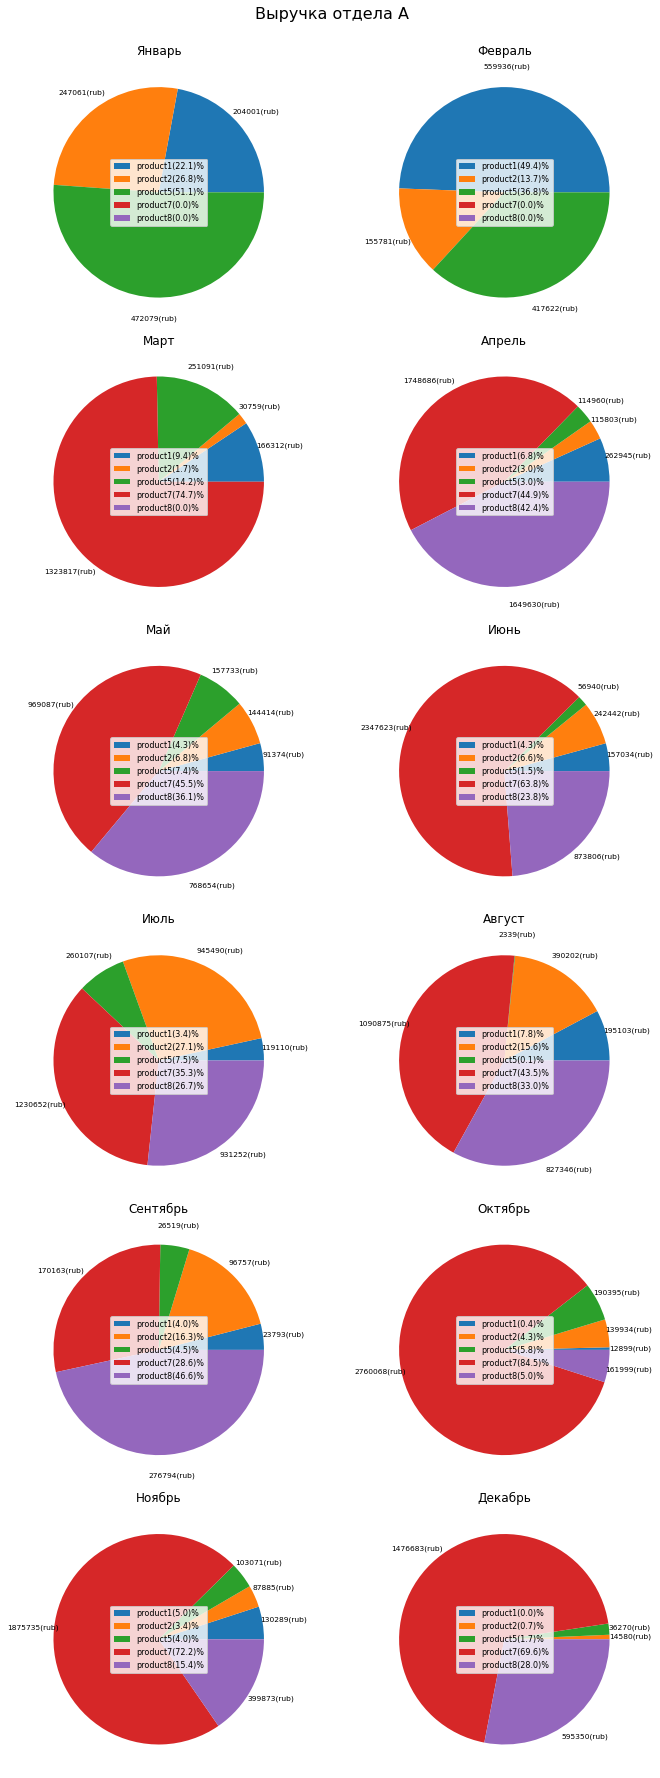

In [204]:
graphics('A')

**Январь 
Февраль
Март
Апрель 

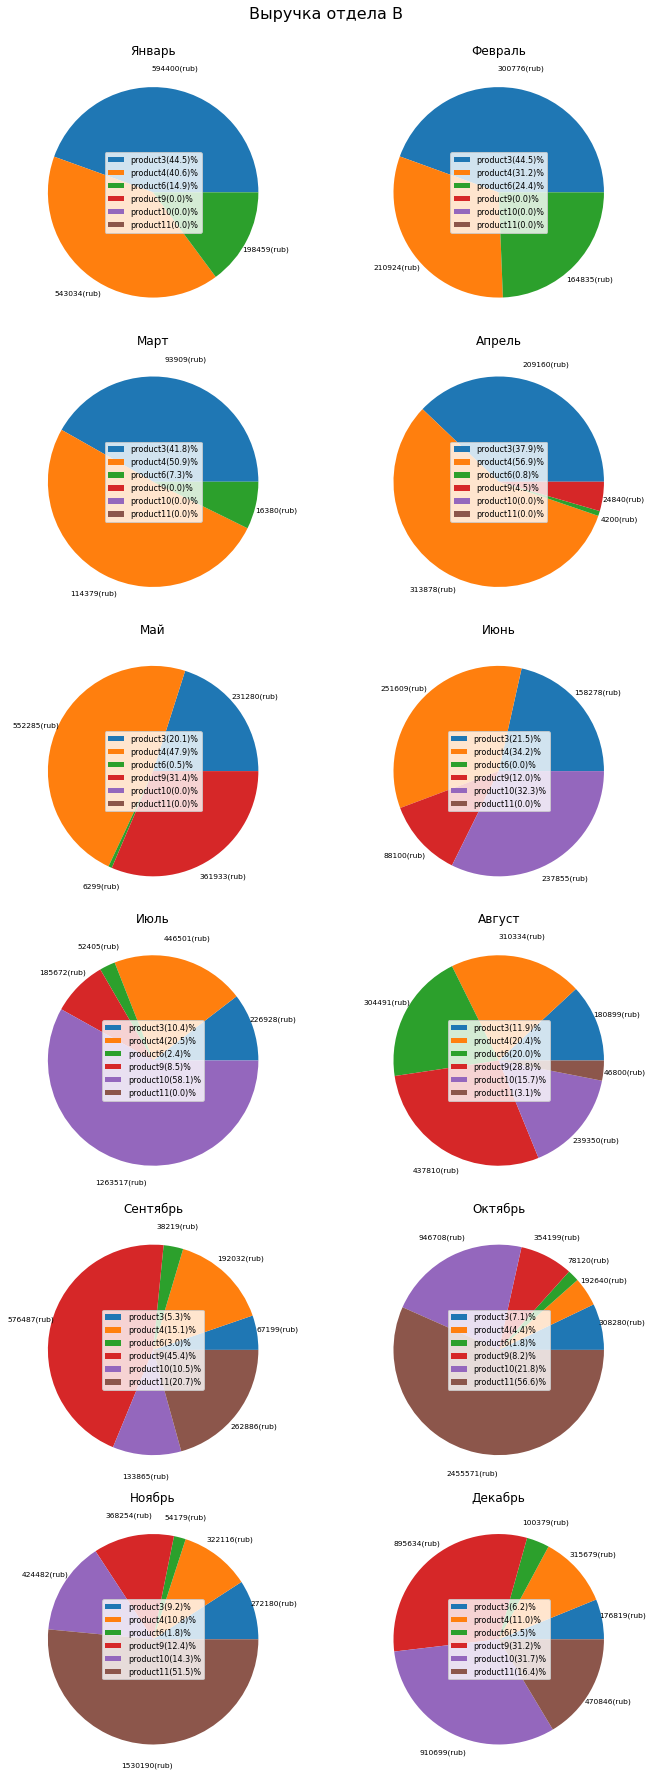

In [135]:
graphics('B')

### b)
### i) Посчитать NPS каждого продукта юнитов A и B и средние NPS по продуктам отделов

In [125]:
df3

,Название курса,ID пользователя,Оценка
0,Введение в нейробиологию,id7137,7
1,Введение в нейробиологию,id6805,7
2,Введение в нейробиологию,id3323,8
3,Введение в нейробиологию,id2286,4
4,Введение в нейробиологию,id14009,7
...,...,...,...
13858,Экскурс в историю моды,id689,10
13859,Экскурс в историю моды,id468,8
13860,Экскурс в историю моды,id7055,9
13861,Экскурс в историю моды,id460,3


In [126]:
df3['Юнит'] = np.where(df3['Название курса'].isin(df1.loc[df1['Юнит'] == 'A', 'Название продукта']), 'A', 'B')
df3['NPS'] = np.where(df3['Оценка'] >= 9, 'p', np.where(df3['Оценка'] < 7, 'd', 'n'))
df3

,Название курса,ID пользователя,Оценка,Юнит,NPS
0,Введение в нейробиологию,id7137,7,B,n
1,Введение в нейробиологию,id6805,7,B,n
2,Введение в нейробиологию,id3323,8,B,n
3,Введение в нейробиологию,id2286,4,B,d
4,Введение в нейробиологию,id14009,7,B,n
...,...,...,...,...,...
13858,Экскурс в историю моды,id689,10,A,p
13859,Экскурс в историю моды,id468,8,A,n
13860,Экскурс в историю моды,id7055,9,A,p
13861,Экскурс в историю моды,id460,3,A,d


In [144]:
sat = df3.groupby([df3['Юнит'], df3['Название курса'], df3['NPS']]).count()
sat

ID пользователя  Оценка
Юнит Название курса                    NPS                         
A    Здоровый образ жизни              d                345     345
                                       n                 95      95
                                       p                118     118
     История западных культур          d                397     397
                                       n                136     136
                                       p                130     130
     Как аргументировать свою позицию  d               2340    2340
                                       n               1280    1280
                                       p                808     808
     Что скрыл художник?               d                958     958
                                       n                334     334
                                       p                490     490
     Экскурс в историю моды            d                436     436
                                       n                164     164
                                       p                170     170
B    Введение в нейробиологию          d                714     714
                                       n                236     236
                                       p                222     222
     Главные идеи в мировой философии  d                821     821
                                       n                240     240
                                       p                260     260
     Искусство киноязыка               d                526     526
                                       n                192     192
                                       p                170     170
     Как научиться ценить музыку       d                500     500
                                       n                168     168
                                       p                174     174
     Путеводитель по истории искусства d                639     639
                                       n                238     238
                                       p                247     247
     Современный этикет                d                180     180
                                       n                 67      67
                                       p                 68      68

**NPS каждого продукта:**

In [197]:
def NPS_course(x):
    return (x['NPS'].loc[x['NPS'] == 'p'].count() - x['NPS'].loc[x['NPS'] == 'd'].count())/x['NPS'].count()


df3.groupby([df3['Юнит'], df3['Название курса'], df3['NPS']])
NPS = df3.groupby([df3['Юнит'], df3['Название курса']]).apply(NPS_course)
print(NPS)

Юнит  Название курса                   
A     Здоровый образ жизни                -0.406810
      История западных культур            -0.402715
      Как аргументировать свою позицию    -0.345980
      Что скрыл художник?                 -0.262626
      Экскурс в историю моды              -0.345455
B     Введение в нейробиологию            -0.419795
      Главные идеи в мировой философии    -0.424678
      Искусство киноязыка                 -0.400901
      Как научиться ценить музыку         -0.387173
      Путеводитель по истории искусства   -0.348754
      Современный этикет                  -0.355556
dtype: float64


In [198]:
df_course = pd.DataFrame({'Название курса': df3['Название курса'].unique(), 'Юнит': np.where(df_course['Название курса'].isin(df1.loc[df1['Юнит'] == 'A', 'Название продукта']), 'A', 'B')})
df_course['NPS'] = NPS.values
df_course['NPS'].groupby(df_course['Юнит']).mean()

Юнит
A   -0.363108
B   -0.380817
Name: NPS, dtype: float64

**Cредние NPS по продуктам отделов:  
А: -0.3631  
В: -0.3808**

In [199]:
# число промоутеров в юните B
p_B = df3[(df3['NPS'] == 'p') & (df3['Юнит'] == 'B')]['NPS'].count()
p_B

1141

In [200]:
count = 0
for p in np.arange(0, 1.001, 0.001):
    if revenue['B'] + p*p_B*revenue_average_all[1] >= revenue['A']:
        print(p)
        print(revenue['B'] + p*p_A*revenue_all[1])
        count += 1
if count == 0:
    print('Нет такого p')
    

Нет такого p


**У юнита В выручка меньше(cумма платежей для юнита А = 28 101 150, а для юнита В = 19 819 210). При этом среди людей, оценивших курсы этого отдела, всего 1141 промоутер. Средний чек для этого отдела равен примерно 3500. С учетом того, что каждый промоутер приглашает только одного друга с определенной вероятностью p, даже если предположить, что p = 1, доход полученный с 1141  пришедших клиентов, не покроет разницы в выручке.**

# SQL

SELECT first_pilot_id  
FROM flights  
GROUP BY first_pilot_id  
ORDER BY SUM(quantity) DESC  
LIMIT 10